# 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_excel('C:/Users/JeeYeon Kim/data_study_24th/3.Machine_Learning/pca_credit_card.xls',header=1, sheet_name='Data').iloc[:,1:]
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [2]:
df.shape

(30000, 24)

In [3]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# 데이터 분할

In [5]:
X_features = df.iloc[:,:-1]
y_target = df.iloc[:,-1]

# 피쳐 간 상관관계(다중공선성) 확인 by heatmap

<Axes: >

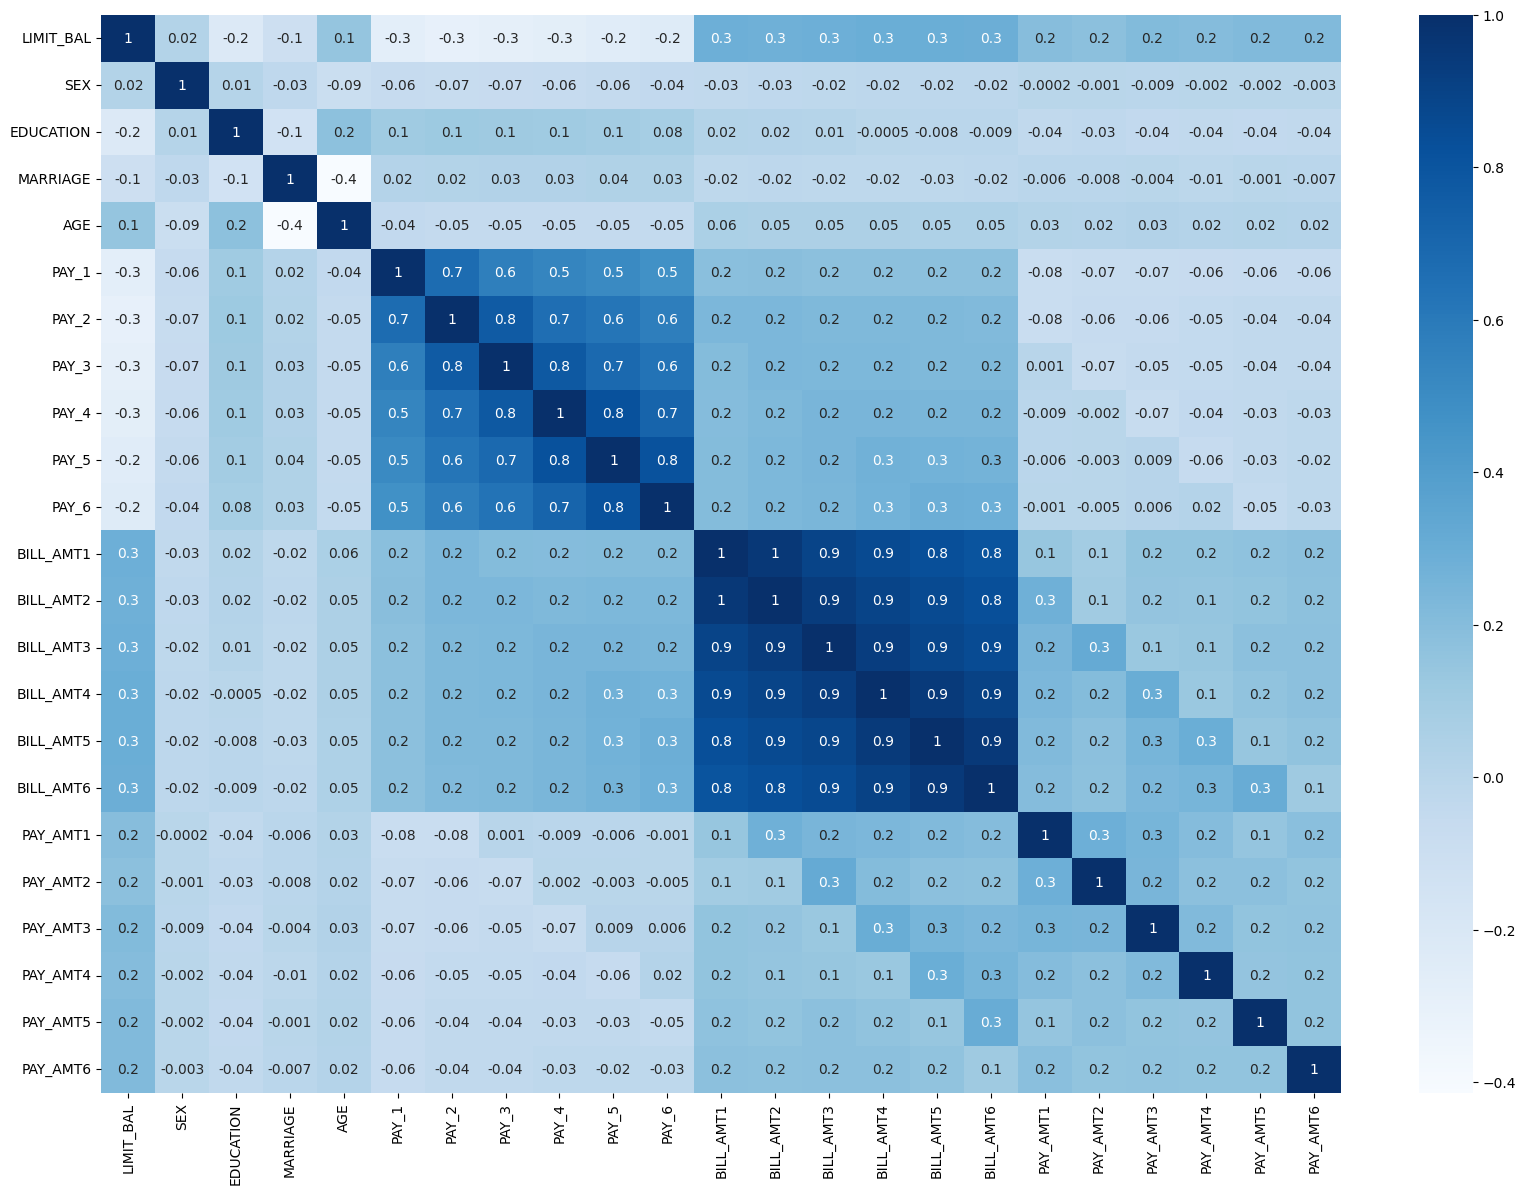

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr,
            cmap='Blues',
            annot=True,
           fmt='.1g')


## bill 컬럼들/ pay 컬럼들끼리 상관관계 높음 -> PCA로 차원 축소

In [7]:
X_features

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [8]:
y_target

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [9]:
X_features.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

scaler = StandardScaler()
df_bill= pd.DataFrame()
for i in cols_bill:
    df_bill[i] = df[i]
    
df_scaled = scaler.fit_transform(df_bill)
pca = PCA(n_components= 2)
pca.fit(df_scaled)
print('PCA component별 변동성:',pca.explained_variance_ratio_)

PCA component별 변동성: [0.90555253 0.0509867 ]


## cross_val_score

- 원본데이터 세트 교차검증

In [11]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(random_state = 156, n_estimators = 300)
scores = cross_val_score(
            rcf,
            X_features, y_target, 
            scoring='accuracy', cv=3)

print('CV=3 인 경우 개별 Fold 세트별 정확도: {}'.format(scores))

CV=3 인 경우 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]


In [12]:
print('평균 정확도: {:.4f}'.format(np.mean(scores)))

평균 정확도: 0.8170


- PCA 변환된 데이터 검증

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring= 'accuracy',cv=3)

print('CV=3인경우 PCA 변환된 개별 Fold 세트별 정확도: ', scores_pca)
print('평균 정확도: ',np.mean(scores_pca))

CV=3인경우 PCA 변환된 개별 Fold 세트별 정확도:  [0.7898 0.7962 0.8014]
평균 정확도:  0.7958
